In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
import scipy as sp
from scipy import stats

,score
0,76
1,55
2,80
3,80
4,74


모평균, 모분산: 69.53 206.6691


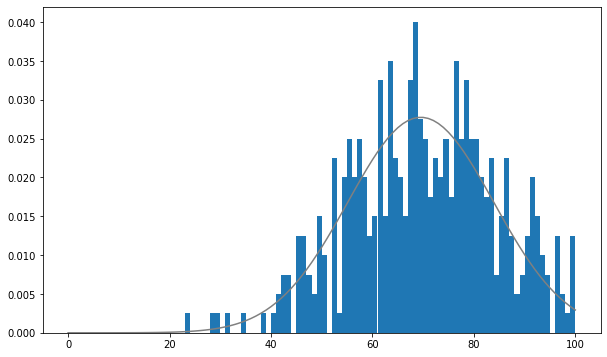

모평균: 69.53 
 표본평균의 기댓값: 69.53799999999998


69.542954

In [24]:
# 시험점수 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['score'])
display(df.head())

# 모평균과 모분산 
p_mean = np.mean(scores)
p_var = np.var(scores)
print('모평균, 모분산:', p_mean, p_var)

# 시험점수 모집단(전교생 시험점수)이 정규분포를 따른다고 가정 
plt.figure(figsize=(10,6))
xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
plt.plot(xs, rv.pdf(xs), color='gray')
plt.hist(scores, bins=100, range=(0,100), density=True) # 전체 시험점수 히스토그램
plt.show()

n = 20
# 표본 크기가 20인 표본 데이터 1만 개 추출
# (표본으로 평균과 분산을 어느 저옫의 정확도로 추출할 수 있는지 시뮬레이션)
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

## 대수의 법칙을 사용하여 기댓값이 모평균인 것을 확인
sample_means = np.mean(samples, axis=1) # 준비해둔 1만 개의 표본 데이터(n=20) 각각의 표본평균을 구하고
s_means = np.mean(sample_means)         # 그 표본평균들의 평균(기댓값) 계산
print('모평균:', p_mean, '\n', 
      '표본평균의 기댓값:', s_means)
## 표본크기 n을 백만까지 키웠을 때의 표본평균
np.mean(np.random.choice(scores, int(1e6)))

In [25]:
## 표본분산이 모분산의 불편추정량이 되는지 대수의 법칙으로 확인
sample_vars = np.var(samples, axis=1) # 준비해둔 1만 개의 표본 데이터 각각의 표본분산 구하고
s_vars = np.mean(sample_vars)         # 표본분산의 평균 
## 불편분산이 모분산의 불편추정량이 되는지 확인
sample_u_vars = np.var(samples, axis=1, ddof=1)
u_vars = np.mean(sample_u_vars)
print('모분산:', p_var, '\n', 
      '표본분산:', s_vars, '\n', 
     '불편분산:', u_vars)

모분산: 206.6691 
 표본분산: 196.34417850000003 
 불편분산: 206.67808263157895


In [26]:
s_mean = np.mean(sample)
u_var = np.var(sample, ddof=1)

rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)
lcl,ucl

(126.58633934254858, 130.31508922888)

In [27]:
# 1시간당 액세스 수
n_access_df = pd.read_csv('data/ch10_access.csv')
print(len(n_access_df),'\n', n_access_df.head(),'\n')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

s_mean = n_access.mean()
s_mean

rv = stats.norm
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)
lcl,ucl

72 
    access number
0             10
1             11
2              9
3              9
4             18 



(9.697953549598202, 11.190935339290688)

In [28]:
# 검정통계량이 임곗값보다 작으므로 귀무가설을 기각한다.
df = pd.read_csv('./data/ch11_potato.csv')
sample = df.무게

# 검정통계량
s_mean = np.mean(sample)
z = (s_mean - 130) / np.sqrt(9/14)
print(z,'\n')

# 임곗값
rv = stats.norm()
rv.isf(0.95)

-1.932298779026813 



-1.6448536269514722

In [29]:
# p값이 유의수준 0.05 보다 작으므로 귀무가설을 기각한다. 
# "모평균은 130g이다"라는 결론이 되는 것은 아니다.
p_value = rv.cdf(z)
p_value

0.026661319523126635

AttributeError: 'AxesSubplot' object has no attribute 'vline'

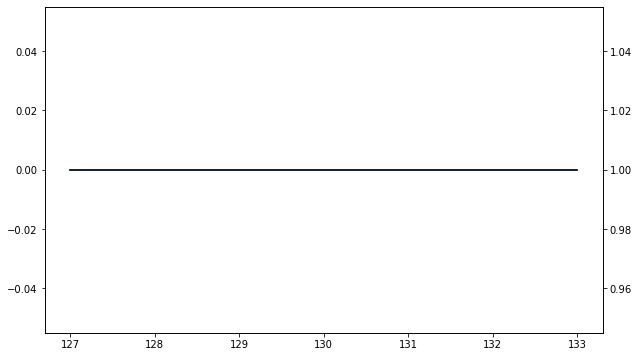

In [30]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127,133,60)
ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs), color='black')
ax1.vline(rv.ppf(0.05), 0,0.5,color='gray',ls='--')
ax1.set_xlabel('x',fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)
ax2.set_ylabel('cdf',rotation=0,fontsize=20)


In [31]:
# 양측검정
z = (s_mean-130) / np.sqrt(9/14)
z

-1.932298779026813

In [32]:
rv = stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [33]:
# 양측검정의 p값은 상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도함수의 2배로 한다.
# p값이 0.05보다 크므로 귀무가설은 기각되지 않는다. '감자튀김 무게는 130g이 아니다' 라고 말할 수 없다.
rv.cdf(z) * 2

0.05332263904625327

#### 가설검정에서의 두가지 오류
- 제 1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
  - 실제로 평균이 130g인데도 '모평균은 130g 보다 작다'라는 결론을 내리는 상황
- 제 2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
  - 모평균은 130g 보다 작다인데도 '모평균은 130g 보다 작다' 라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제 1종 오류는 제어할 수 있지만 제 2종 오류는 제어할 수 없는 비대칭성이 있다.


In [50]:
# 제 1종 오류를 범할 비율 : 위험률, 유의수준(𝛼), 분석가가 제어할 수 있는 확률
rv = stats.norm(130,3)
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130)/ np.sqrt(9/14)
    if z < c :
        cnt += 1
cnt / n_samples

0.0521

In [51]:
# 제 2종 오류를 범하는 비율 : 1 - 𝛽 , 검정력, 분석가가 제어할 수 없는 확률
# [과제] 감자튀김 사례로 2종 오류를 범하는 비율을 구하세요.(감자튀김 평균이 128g으로 설정되어 있는 것을 알고 있다고 가정))

정규분포의 모평균에 대한 검정(모분산을 알고 있음)

In [ ]:
# [과제] 모평균에 대한 검정을 사용자 함수 pmean_test()를 작성하여 감자튀김 사례에 대하여 양측검정으로 수행하세요.

In [52]:
# 정규분포의 모분산에 대한 검정
def pvar_test(sample,var0,alpha=0.05):
    u_var = np.var(sample,ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)
    
    y = (n-1) * u_var / var0 # 검정 통계량
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
        
    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')
        

In [53]:
pvar_test(sample, 9)

귀무가설을 채택
p값은 0.085


정규분포의 모평균에 대한 검정(모분산을 알지 못함)

In [56]:
def pmean_test(sample,mean0,alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample,ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1-rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')


[과제] 대응표본, 독립표본에 대하여 정규분포를 가정하는 경우와 가정할 수 없는 경우의 4가지 유형의 각 사례를 작성하세요.

In [1]:
# 정규분포를 가정
# 대응표본 t검정 - ex) 같은 시간에 수영을 하는 아침반 사람들이 수영을 한달 한 뒤 체중의 변화가 있는지를 검정?
# 독립표본 t검정 - ex) 아침반 사람들은 초보자이고 오후반 사람들은 선수반인데 수영을 한달 한 뒤 두반의 체중의 변화가 있는지를 검정?
# 정규분포를 가정할 수 없는 경우
# 대응표본 - 윌콕슨의 부호순위검정
# 독립표본 - 만 위트니의 U검정

In [3]:
import pandas as pd
# 대응표본 t검정
data = pd.read_csv('./data/ch11_training_rel.csv')
data['gap'] = data['후'] - data['전']
print(data.shape, '\n', data.head())

(20, 3) 
     전   후  gap
0  59  41  -18
1  52  63   11
2  55  68   13
3  61  59   -2
4  59  84   25


In [6]:
#  p값이 유의수준 0.05 보다 작으므로 귀무가설을 기각하며 '근력운동은 집중력에 유의한 차이를 가져온다'라고 할 수 있다. 
t, p = stats.ttest_1samp(data.gap, 0)
p

0.04004419061842953

In [7]:
# 독립표본 t검정
data = pd.read_csv('./data/ch11_training_ind.csv')
print(data.head())

    A   B
0  47  49
1  50  52
2  37  54
3  60  48
4  39  51


In [8]:
# p값이 0.05 보다 크므로 귀무가설을 채택하며 'A 학생의 학급과 B 학생의 학급사이에는 평균 점수에 유의한 차이가 있다고 말할 수 없다.'
t,p = stats.ttest_ind(data.A, data.B, equal_var=False)
p

0.08695731107259362

In [9]:
# [과제] 정규분포를 가정할 수 없는 경우 대응표본에 대한 가설검정을 수행하세요.
data = pd.read_csv('./data/ch11_training_rel.csv')
data1 = data[:6].copy()

In [10]:
# [과제] 정규분포를 가정할 수 없는 경우 독립표본에 대한 가설검정을 수행하세요.
data = pd.read_csv('./data/ch11_training_ind.csv')
data2 = data[:5].copy()